<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/assignment3/CRISP-DM%3A%20Date%20cleaning%20and%20modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the convience, I will do Data preparation and last step together here

##CRISP-DM: Data Preparation(select and cleanse)

###Objective:
To select data we want to use and clean it out for null data

## Select and clean the data

In [3]:
import pandas as pd

df = pd.read_csv('loans_train.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

let's clean null data from the dataset

In [5]:
df.dropna(inplace=True,how='any')
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [10]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

I need to change data types object and float64 to int 64

In [12]:
from sklearn.preprocessing import LabelEncoder

def changetoInt(df, column_name):

    encoder = LabelEncoder()
    encoded_column = encoder.fit_transform(df[column_name])
    df[column_name] = encoded_column
    return df

In [13]:
# Using function to encoding of data
changetoInt(df,'Gender')
changetoInt(df,'Married')
changetoInt(df,'Self_Employed')
changetoInt(df,'Education')
changetoInt(df,'Loan_Status')
changetoInt(df,'Property_Area')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [16]:
df['Dependents'] = df['Dependents'].str.replace('+', '')

<ipython-input-16-d3fb1034d77b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents'] = df['Dependents'].str.replace('+', '')


In [17]:
df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']] = df[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']].astype(int)


In [18]:
df.dtypes

Loan_ID              object
Gender                int64
Married               int64
Dependents            int64
Education             int64
Self_Employed         int64
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area         int64
Loan_Status           int64
dtype: object

We selected all the usable data and cleaned everything to Int

## Hypothesis and Modeling

Now we will use pycaret to find out which model we have to use and apply it to data. Lastly, we will the test data to find out whether we can give loan correctly

In [19]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.0 MB/s eta 0:0

In [21]:
from pycaret.classification import *

In [22]:
data_setup = setup(df, target='Loan_Status',  train_size = 0.6, session_id=123)

,Description,Value
0,Session id,123
1,Target,Loan_Status
2,Target type,Binary
3,Original data shape,"(480, 13)"
4,Transformed data shape,"(480, 13)"
5,Transformed train set shape,"(288, 13)"
6,Transformed test set shape,"(192, 13)"
7,Numeric features,11
8,Categorical features,1
9,Preprocess,True


In [84]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8156,0.0000,0.9745,0.8037,0.8799,0.4965,0.5525,0.0700
lr,Logistic Regression,0.8016,0.7152,0.9592,0.7978,0.8702,0.4623,0.5092,0.1220
nb,Naive Bayes,0.7669,0.7583,0.8992,0.7959,0.8418,0.3985,0.4205,0.1420
et,Extra Trees Classifier,0.7499,0.6875,0.9795,0.7421,0.8438,0.2672,0.3681,0.4170
dt,Decision Tree Classifier,0.6910,0.5000,1.0000,0.6910,0.8172,0.0000,0.0000,0.1560
rf,Random Forest Classifier,0.6910,0.7575,1.0000,0.6910,0.8172,0.0000,0.0000,0.2530
qda,Quadratic Discriminant Analysis,0.6910,0.5000,1.0000,0.6910,0.8172,0.0000,0.0000,0.0720
ada,Ada Boost Classifier,0.6910,0.5000,1.0000,0.6910,0.8172,0.0000,0.0000,0.0720
gbc,Gradient Boosting Classifier,0.6910,0.5000,1.0000,0.6910,0.8172,0.0000,0.0000,0.1310
lda,Linear Discriminant Analysis,0.6910,0.5000,1.0000,0.6910,0.8172,0.0000,0.0000,0.0730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [31]:
print(best_model)


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)


Looks like RidgeClassifier is the best here

In [32]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [54]:
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [85]:
ridge = create_model('ridge')









,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
1,0.8966,0.0000,0.9500,0.9048,0.9268,0.7507,0.7533
2,0.7586,0.0000,0.9000,0.7826,0.8372,0.3792,0.3934
3,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
4,0.8966,0.0000,1.0000,0.8696,0.9302,0.7339,0.7614
5,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
6,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
7,0.7586,0.0000,1.0000,0.7407,0.8511,0.2827,0.4057
8,0.8214,0.0000,1.0000,0.8000,0.8889,0.4615,0.5477


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [86]:
tune_model_ridge = tune_model(ridge)









,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
1,0.8966,0.0000,0.9500,0.9048,0.9268,0.7507,0.7533
2,0.7586,0.0000,0.9000,0.7826,0.8372,0.3792,0.3934
3,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
4,0.8966,0.0000,1.0000,0.8696,0.9302,0.7339,0.7614
5,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
6,0.8276,0.0000,1.0000,0.8000,0.8889,0.5246,0.5963
7,0.7586,0.0000,1.0000,0.7407,0.8511,0.2827,0.4057
8,0.8214,0.0000,1.0000,0.8000,0.8889,0.4615,0.5477


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [87]:
predict_model(tune_model_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7969,0.6789,0.9850,0.7798,0.8704,0.4286,0.4992


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,prediction_label
211,LP001711,1,1,3,0,0,3430,1250,128,360,0,1,0,0
182,LP001636,1,1,0,0,0,4600,0,73,180,1,1,1,1
115,LP001401,1,1,1,0,0,14583,0,185,180,1,0,1,1
243,LP001807,1,1,2,0,1,6250,1300,108,360,1,0,1,1
531,LP002720,1,1,3,0,0,4281,0,100,360,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,LP002467,1,1,0,0,0,3708,2569,173,360,1,2,0,1
329,LP002087,0,0,0,0,0,2500,0,67,360,1,2,1,1
390,LP002255,1,0,3,0,0,9167,0,185,360,1,0,1,1
537,LP002738,1,0,2,0,0,3617,0,107,360,1,1,1,1


In [89]:
final_model_ridge = finalize_model(tune_model_ridge)
print(final_model_ridge)


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Gender', 'Married', 'Dependents',
                                             'Education', 'Self_Employed',
                                             'ApplicantIncome',
                                             'CoapplicantIncome', 'LoanAmount',
                                             'Loan_Amount_Term',
                                             'Credit_History',
                                             'Property_Area'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_em...
                                    transformer=TargetEncoder(cols=['Loan_I

In [90]:
predict_model(final_model_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7969,0.6789,0.9850,0.7798,0.8704,0.4286,0.4992


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,prediction_label
211,LP001711,1,1,3,0,0,3430,1250,128,360,0,1,0,0
182,LP001636,1,1,0,0,0,4600,0,73,180,1,1,1,1
115,LP001401,1,1,1,0,0,14583,0,185,180,1,0,1,1
243,LP001807,1,1,2,0,1,6250,1300,108,360,1,0,1,1
531,LP002720,1,1,3,0,0,4281,0,100,360,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,LP002467,1,1,0,0,0,3708,2569,173,360,1,2,0,1
329,LP002087,0,0,0,0,0,2500,0,67,360,1,2,1,1
390,LP002255,1,0,3,0,0,9167,0,185,360,1,0,1,1
537,LP002738,1,0,2,0,0,3617,0,107,360,1,1,1,1


Now test with test dataset

In [93]:
dftest = pd.read_csv("loans_test.csv")
dftest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [94]:
dftest.dropna(inplace=True,how='any')

In [95]:
changetoInt(dftest,'Gender')
changetoInt(dftest,'Married')
changetoInt(dftest,'Self_Employed')
changetoInt(dftest,'Education')
changetoInt(dftest,'Property_Area')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,LP001054,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,0,0,2269,2167,99.0,360.0,1.0,1
362,LP002971,1,1,3+,1,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [96]:
dftest['Dependents'] = dftest['Dependents'].str.replace('+', '')

In [97]:
# Chnging datatypes of columns
dftest[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']] = dftest[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']].astype(int)

In [101]:
pred_holdouts = predict_model(ridge,data=dftest)
pred_holdouts

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,prediction_label
0,LP001015,1,1,0,0,0,5720,0,110,360,1,2,1
1,LP001022,1,1,1,0,0,3076,1500,126,360,1,2,1
2,LP001031,1,1,2,0,0,5000,1800,208,360,1,2,1
4,LP001051,1,0,0,1,0,3276,0,78,360,1,2,1
5,LP001054,1,1,0,1,1,2165,3422,152,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,1,1,1,0,0,2269,2167,99,360,1,1,1
362,LP002971,1,1,3,1,1,4009,1777,113,360,1,2,1
363,LP002975,1,1,0,0,0,4158,709,115,360,1,2,1
365,LP002986,1,1,0,0,0,5000,2393,158,360,1,0,1


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

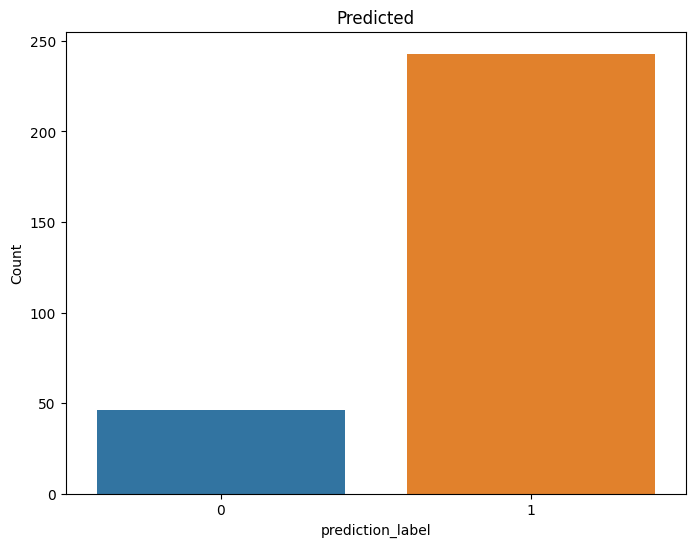

In [106]:
plt.figure(figsize=(8, 6))
sns.countplot(x='prediction_label', data=pred_holdouts)
plt.title('Predicted')
plt.xlabel('prediction_label')
plt.ylabel('Count')
plt.show()

Not that bad.

New test is almost predicted by the model.